### Bruna

* Implemente um classificador binário (SGD) para identificar a qual grupo (chd) pertence 0 ou 1 Mostre a acurácia , a matriz de confusão de cada classificador, precisão, recall e f1 score


### Bibliotecas principais 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Banco de dados

In [2]:
db = pd.read_csv('SAheart.csv')

db

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### Informacoes preliminares

* Observando o banco de dados de forma Geral :

In [3]:
db.shape  #tamanho do banco de dados

(462, 10)

In [4]:
db.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

* Quantidade de valores nulos

In [5]:
db.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

* Tratando variaveis categoricas

In [6]:
from sklearn.preprocessing import LabelEncoder

categ_encod = preprocessing.LabelEncoder()
db["famhist"] = categ_encod.fit_transform(db["famhist"])

db["famhist"]

1      1
2      0
3      1
4      1
5      1
      ..
459    0
460    0
461    0
462    0
463    1
Name: famhist, Length: 462, dtype: int64

* valores categoricos

In [7]:
pd.unique(db["famhist"])

array([1, 0])

* Conhecendo a idade das pessoas

In [8]:
pd.unique(db["age"])

array([52, 63, 46, 58, 49, 45, 38, 29, 53, 60, 40, 17, 15, 62, 59, 20, 44,
       50, 42, 48, 61, 56, 41, 28, 32, 30, 51, 33, 16, 31, 18, 57, 54, 27,
       26, 36, 34, 55, 39, 21, 64, 37, 25, 43, 24, 47, 23, 35, 19])

### Levantamento de Hipoteses

* Exploracao do db a partir de dados categoricos

In [9]:
db.groupby('chd').count()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
chd,,,,,,,,,
0,302,302,302,302,302,302,302,302,302
1,160,160,160,160,160,160,160,160,160


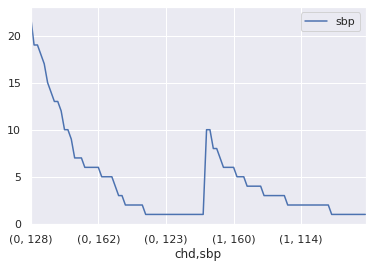

In [10]:
db.groupby('chd')['sbp'].value_counts().plot(legend = True, grid = True)


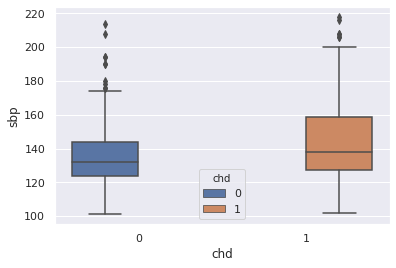

In [11]:
sns.boxplot(x ='chd', y='sbp', hue = 'chd', data = db)

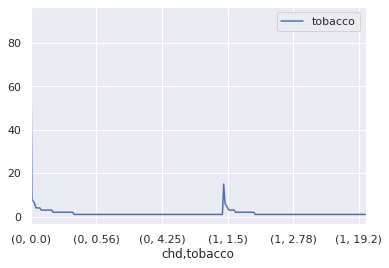

In [12]:
db.groupby('chd')['tobacco'].value_counts().plot(legend = True, grid = True)

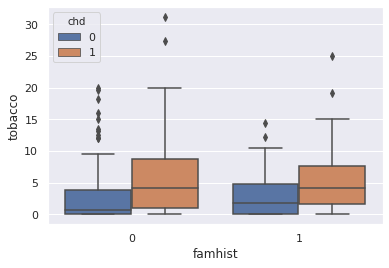

In [13]:
sns.boxplot(x ='famhist', y='tobacco', hue = 'chd', data = db)

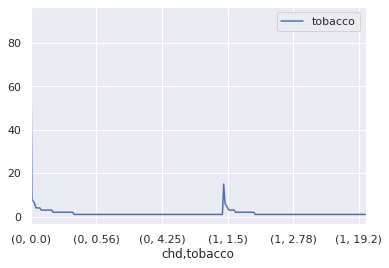

In [14]:
db.groupby('chd')['tobacco'].value_counts().plot(legend = True)

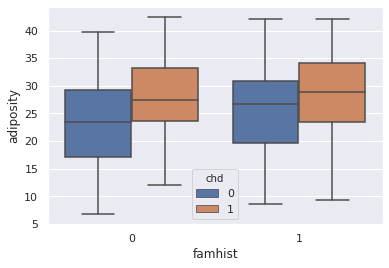

In [15]:
sns.boxplot(x ='famhist', y='adiposity', hue = 'chd', data = db)

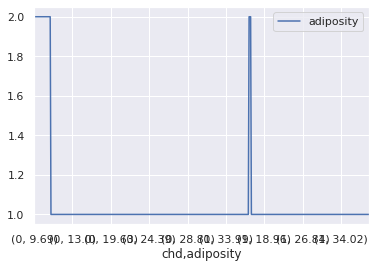

In [16]:
db.groupby('chd')['adiposity'].value_counts().plot(legend = True, grid = True)

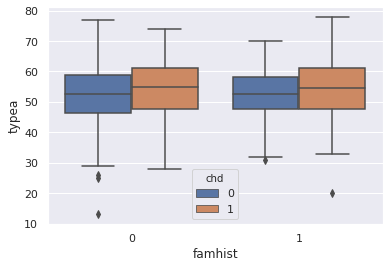

In [17]:
sns.boxplot(x ='famhist', y='typea', hue = 'chd', data = db)

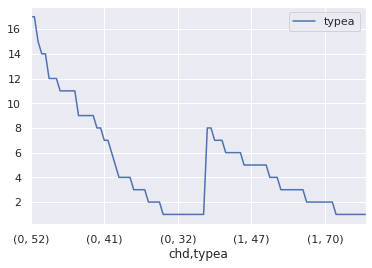

In [18]:
db.groupby('chd')['typea'].value_counts().plot(legend = True, grid = True)

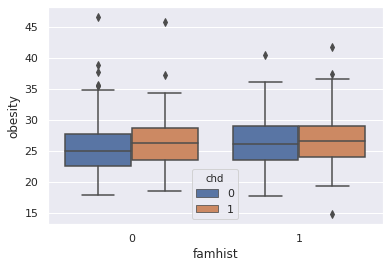

In [19]:
sns.boxplot(x ='famhist', y='obesity', hue = 'chd', data = db)

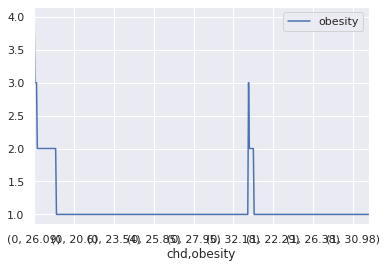

In [20]:
db.groupby('chd')['obesity'].value_counts().plot(legend = True, grid = True)



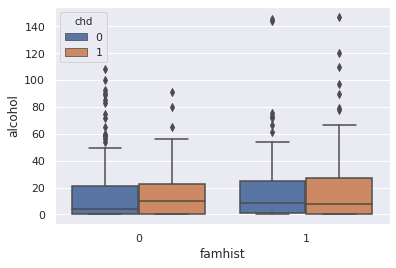

In [21]:
sns.boxplot(x ='famhist', y='alcohol', hue = 'chd', data = db)

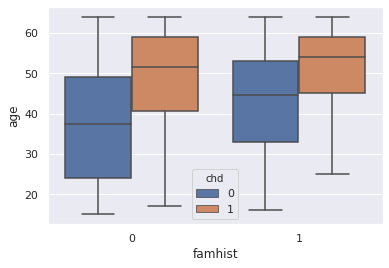

In [22]:
sns.boxplot(x ='famhist', y='age', hue = 'chd', data = db)

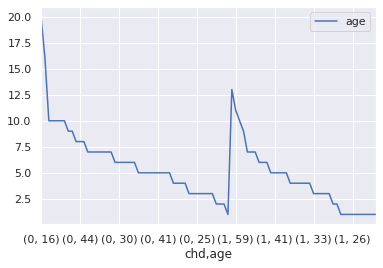

In [23]:
db.groupby('chd')['age'].value_counts().plot(legend = True, grid = True)

In [24]:
db.corr()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000
